<a href="https://colab.research.google.com/github/tamiti-ruet-ece/3-classes-bangla-SA/blob/main/Helper_Function_3_classes_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers

     |████████████████████████████████| 4.0 MB 4.4 MB/s 
     |████████████████████████████████| 596 kB 57.9 MB/s 
     |████████████████████████████████| 6.6 MB 63.3 MB/s 
     |████████████████████████████████| 77 kB 6.1 MB/s 
     |████████████████████████████████| 895 kB 53.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
import pandas as pd
import seaborn as sns
import re

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_train=pd.read_csv('/content/drive/MyDrive/thesis/3 classes/Train.csv')
df_test=pd.read_csv('/content/drive/MyDrive/thesis/3 classes/Test.csv')
df_validation=pd.read_csv('/content/drive/MyDrive/thesis/3 classes/Val.csv')
df=pd.concat([df_train,df_test,df_validation])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15728 entries, 0 to 1566
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    15728 non-null  object
 1   Label   15728 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 368.6+ KB


In [5]:
df.head()

,Data,Label
0,মুগ্ধ হয়ে গেলাম মামু. আর তোমায় কি কমু. বলো তোম...,1
1,এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তায়...,2
2,ভাই আপনার কথাই যাদু রয়েছে,1
3,উওরটা আমার অনেক ভাল লেগেছে,1
4,আমার নিজের গাড়ী নিয়ে কি সাজেক যেতে পারবো না ?...,0


In [6]:
from sklearn.utils import shuffle
df = shuffle(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


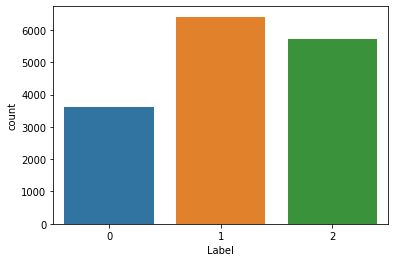

In [7]:
sns.countplot(df['Label'])

In [8]:
df.Label.value_counts(), len(df)

(1    6410
 2    5709
 0    3609
 Name: Label, dtype: int64, 15728)

In [9]:
df.shape

(15728, 2)

In [10]:
df = df.dropna(subset=['Label'])

In [11]:
df.shape

(15728, 2)

In [12]:
df.head()

,Data,Label
4580,"যে দেশে মানুষ মানুষের দুঃখ কষ্ট বুঝে না , সে দ...",2
3262,সেও রাজমাতা হয়ে জামাই বাড়ীতেই থাকে,0
660,"ওর জনো দোয়া রইলো , ও জেনো একদিন অনেক বড় হয়",1
363,আপনারা অনেক দেরিতে তার খোজ পেয়েছেন,0
6948,সারা দেশেই নারীরা কর্মক্ষেত্রে উর্ধ্বতন কর্মকর...,2


In [13]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"
                           
                                     #generalPunctuations
                               
                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)
    
    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰⚽️✌�￰৷￰[!@#$%^&*()_+-={}\[\];:\'\"\|<>,.///?`~।]'''
    
    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

In [14]:
#df.sample(10)

In [15]:
df.shape[0]

15728

In [16]:

print('Original: \n')
print(df.Data[0])
df['Data'] = df.Data.apply(lambda x: preprocessing(str(x)))

print('After Preprocessing: \n')
print(df.Data[0])

Original: 

0         আর আমার খুবেই আনন্দ লাকছে ভাইটি চাকরি পেয়েছে
0    মুগ্ধ হয়ে গেলাম মামু. আর তোমায় কি কমু. বলো তোম...
0    স্বাস্থ্যবান হতে চাই , আমি বয়সের তুলনায় অনেক ব...
Name: Data, dtype: object
After Preprocessing: 

0         আর আমার খুবেই আনন্দ লাকছে ভাইটি চাকরি পেয়েছে
0    মুগ্ধ হয়ে গেলাম মামু আর তোমায় কি কমু বলো তোমায়...
0    স্বাস্থ্যবান হতে চাই  আমি বয়সের তুলনায় অনেক বে...
Name: Data, dtype: object


In [17]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['Label']= label_encoder.fit_transform(df['Label'])
 
df['Label'].unique()
df.Label.value_counts(), len(df)

(1    6410
 2    5709
 0    3609
 Name: Label, dtype: int64, 15728)

In [18]:
df.head()

,Data,Label
4580,যে দেশে মানুষ মানুষের দুঃখ কষ্ট বুঝে না সে দে...,2
3262,সেও রাজমাতা হয়ে জামাই বাড়ীতেই থাকে,0
660,ওর জনো দোয়া রইলো ও জেনো একদিন অনেক বড় হয়,1
363,আপনারা অনেক দেরিতে তার খোজ পেয়েছেন,0
6948,সারা দেশেই নারীরা কর্মক্ষেত্রে উর্ধ্বতন কর্মকর...,2


In [19]:
from transformers import BertForMaskedLM, BertTokenizer, pipeline

model = BertForMaskedLM.from_pretrained("csebuetnlp/banglabert")
tokenizer = BertTokenizer.from_pretrained("csebuetnlp/banglabert")
nlp = pipeline('fill-mask', model=model, tokenizer=tokenizer)

Downloading:   0%|          | 0.00/586 [00:00<?, ?B/s]

You are using a model of type electra to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.


Downloading:   0%|          | 0.00/422M [00:00<?, ?B/s]

Some weights of the model checkpoint at csebuetnlp/banglabert were not used when initializing BertForMaskedLM: ['electra.encoder.layer.10.output.dense.bias', 'electra.encoder.layer.0.attention.output.LayerNorm.weight', 'electra.encoder.layer.1.attention.output.LayerNorm.weight', 'discriminator_predictions.dense_prediction.weight', 'electra.encoder.layer.1.output.dense.weight', 'electra.encoder.layer.3.attention.output.LayerNorm.bias', 'electra.embeddings.LayerNorm.weight', 'electra.encoder.layer.3.intermediate.dense.weight', 'electra.encoder.layer.0.attention.output.LayerNorm.bias', 'electra.encoder.layer.1.attention.self.query.bias', 'electra.embeddings.LayerNorm.bias', 'electra.encoder.layer.5.intermediate.dense.weight', 'electra.encoder.layer.0.attention.output.dense.bias', 'electra.encoder.layer.10.output.LayerNorm.weight', 'discriminator_predictions.dense.bias', 'electra.encoder.layer.5.output.LayerNorm.weight', 'electra.encoder.layer.11.attention.self.value.weight', 'electra.enco

Downloading:   0%|          | 0.00/516k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/119 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'ElectraTokenizer'. 
The class this function is called from is 'BertTokenizer'.


In [20]:
count=0

In [21]:
with open("3_classes_bangla_vocabulary.txt", 'w') as f:
    
    # For each token...
    for token in tokenizer.vocab.keys():
        f.write(str(count))
        # Write it out and escape any unicode characters.          
        f.write(token + '\n')
        count=count+1

In [22]:
print(count)

32000


In [23]:
sentences = df['Data']
labels = df['Label']

In [24]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
tokens = []

# For every sentence...
for sent in sentences:
    encoded_sent = tokenizer.tokenize(sent)
    tokens.append(encoded_sent)

df['Token']=tokens

In [25]:
df.head()

,Data,Label,Token
4580,যে দেশে মানুষ মানুষের দুঃখ কষ্ট বুঝে না সে দে...,2,"[যে, দেশে, মানুষ, মানুষের, দুঃখ, কষ্ট, বুঝে, ন..."
3262,সেও রাজমাতা হয়ে জামাই বাড়ীতেই থাকে,0,"[সেও, রাজম, ##াতা, হয়ে, জামাই, বাড়ীতে, ##ই, ..."
660,ওর জনো দোয়া রইলো ও জেনো একদিন অনেক বড় হয়,1,"[ওর, জন, ##ো, [UNK], রইলো, ও, জেনো, একদিন, অনে..."
363,আপনারা অনেক দেরিতে তার খোজ পেয়েছেন,0,"[আপনারা, অনেক, দেরিতে, তার, খোজ, [UNK]]"
6948,সারা দেশেই নারীরা কর্মক্ষেত্রে উর্ধ্বতন কর্মকর...,2,"[সারা, দেশেই, নারীরা, কর্মক্ষেত্রে, উর্ধ্ব, ##..."


In [26]:
input_ids = []
for sent in sentences:
  encoded_sent = tokenizer.encode(
                        sent,                      
                        add_special_tokens = False 
                        )
  input_ids.append(encoded_sent)

df['Token_ID']=input_ids

In [27]:
df.head()

,Data,Label,Token,Token_ID
4580,যে দেশে মানুষ মানুষের দুঃখ কষ্ট বুঝে না সে দে...,2,"[যে, দেশে, মানুষ, মানুষের, দুঃখ, কষ্ট, বুঝে, ন...","[831, 1772, 1019, 1449, 2783, 1921, 2955, 795,..."
3262,সেও রাজমাতা হয়ে জামাই বাড়ীতেই থাকে,0,"[সেও, রাজম, ##াতা, হয়ে, জামাই, বাড়ীতে, ##ই, ...","[6616, 26593, 1426, 824, 7738, 10847, 424, 1117]"
660,ওর জনো দোয়া রইলো ও জেনো একদিন অনেক বড় হয়,1,"[ওর, জন, ##ো, [UNK], রইলো, ও, জেনো, একদিন, অনে...","[1202, 1073, 413, 1, 7478, 219, 26337, 2098, 1..."
363,আপনারা অনেক দেরিতে তার খোজ পেয়েছেন,0,"[আপনারা, অনেক, দেরিতে, তার, খোজ, [UNK]]","[3316, 1011, 18197, 826, 17783, 1]"
6948,সারা দেশেই নারীরা কর্মক্ষেত্রে উর্ধ্বতন কর্মকর...,2,"[সারা, দেশেই, নারীরা, কর্মক্ষেত্রে, উর্ধ্ব, ##...","[2155, 12883, 9576, 21087, 28168, 1878, 8665, ..."


In [28]:
len(df['Token_ID'][100])

3

In [29]:
df.shape

(15728, 4)

In [30]:
df.to_excel('3_classes_Bert_Preprocessed__Dataset.xlsx')

In [31]:
max_features = 10000

maxlen = 200
batch_size = 32

In [33]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [35]:
tokenizer  = Tokenizer(num_words = max_features,oov_token = "<OOV>")
#x_train = str(x_train).lower()
#x_validation = str(x_validation).lower()
#x_test = str(x_test).lower()
tokenizer.fit_on_texts(df['Data'])
train_seq =  tokenizer.texts_to_sequences(df['Data'])


In [36]:
maxlen=0
sum_len=0
length_train=[]
for i in range(0,len(train_seq)):
  maxlen=max(maxlen,len(train_seq[i]))
  sum_len=sum_len+len(train_seq[i])
  length_train.append(len(train_seq[i]))

print("Maximum length of a comment",maxlen)
print('Average length of a comment',sum_len/len(train_seq))

Maximum length of a comment 55
Average length of a comment 13.981370803662259


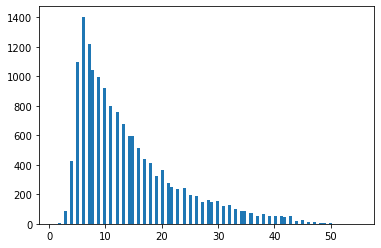

In [37]:
import matplotlib.pyplot as plt
plt.hist(length_train,bins=100)
plt.show()